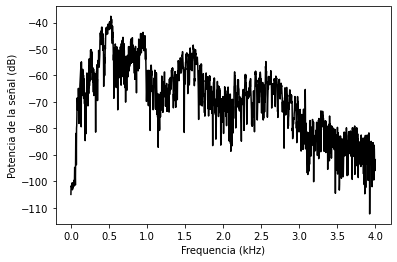

In [4]:
# TRANSFORMACIÓN AL DOMINIO DE LA FRECUENCIA

# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Leer el archivo de audio
frecuencia_de_muestreo, senial = wavfile.read('palabra_hablada.wav')

# Normalizar los valores
senial = senial / np.power(2, 15) 

# Extraer la longitud de la señal de audio
longitud_senial = len(senial)

# Extraer la mitad de la longitud
mitad_longitud = np.ceil((longitud_senial + 1) / 2.0).astype(np.int)

# Aplicar la Transformada de Fourier
frecuencia_senial = np.fft.fft(senial)

# Normalización
frecuencia_senial = abs(frecuencia_senial[0:mitad_longitud]) / longitud_senial

# Cuadrado
frecuencia_senial **= 2

# Extrae la longitud de la señal de frecuencia transformada
len_fts = len(frecuencia_senial)

# Ajustar la señal para casos pares e impares
if longitud_senial % 2:
    frecuencia_senial[1:len_fts] *= 2
else:
    frecuencia_senial[1:len_fts-1] *= 2

# Extraer el valor de potencia en dB
potencia_senial = 10 * np.log10(frecuencia_senial)

# Construir el eje X
eje_x = np.arange(0, mitad_longitud, 1) * (frecuencia_de_muestreo / longitud_senial) / 1000.0

# Graficar la figura
plt.figure()
plt.plot(eje_x, potencia_senial, color='black')
plt.xlabel('Frequencia (kHz)')
plt.ylabel('Potencia de la señal (dB)')
plt.show()
